In [11]:
from keras.preprocessing import image

# Define the path to your image
image_path = '/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0001.png'  # replace with your image path

# Load the image and resize it to the expected input shape of VGG16
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
X = preprocess_input(img_array)

# Now you can pass X to your model for prediction
preds = model.predict(X)



1/1 [==============================] - 0s 233ms/step
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FEDE5A5E4A0>


In [15]:
from keras.preprocessing import image
import numpy as np

# Load the image and resize it to the expected input shape of VGG16
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
X = preprocess_input(img_array)

# Now you can pass X to your model for prediction
preds = model.predict(X)

1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 367ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


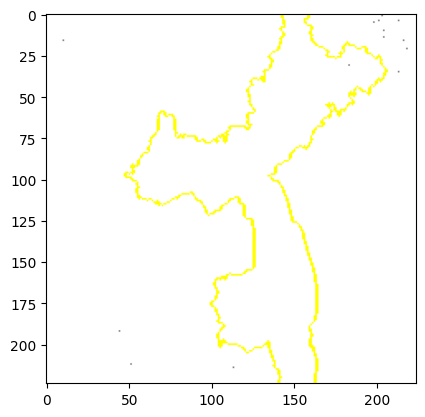

In [20]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from lime import lime_image
from skimage.io import imread
from skimage.segmentation import mark_boundaries

# Load pre-trained model
model = VGG16(weights='imagenet')

# Define the path to your image
image_path = '/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0001.png' # replace with your image path

# Load the image and resize it to the expected input shape of VGG16
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
X = preprocess_input(img_array)

# Now you can pass X to your model for prediction
preds = model.predict(X)

# Instantiate the explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(np.array(img), model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the image and its explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
